# Import data


In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')



def pickle_load(x):
    with open(x, 'rb') as file:
        myvar = pickle.load(file)
    return myvar

data_dict = pickle_load('scraper/data_dict.pkl')
df = pd.DataFrame(data_dict)
df = df.rename(columns={'Nama Toko':'nama_toko','Lokasi Toko':'lokasi_toko','Deskripsi':'deskripsi'})


In [2]:
#Raw data
df.head()

,nama,harga,span,deskripsi,nama_toko,lokasi_toko,link
0,Kaos Gildan Softstyle Polos Tanpa Jahitan Samp...,Rp44.000,"[Terjual, 50, rb+•bintang, 4.8, (7.568, rating...",UNTUK UKURAN XXL NAMBAH Rp. 7000LINK UNTUK MEN...,Newstates Indonesia,"[Jakarta, SelatanOngkir]",https://www.tokopedia.com/newstates-indonesia/...
1,Kaos Polos Katun Bambu [Cotton Bamboo] - SIZE ...,Rp33.500,"[Terjual, 10, rb+•bintang, 4.9, (2.268, rating...",Biasanya pakai kaos COMBED 30S? Kamu wajib ni...,LIDAN OFFICIAL,"[Jakarta, BaratOngkir]",https://www.tokopedia.com/lidanstore/kaos-polo...
2,"kaos polos unisex lengan pendek - navy, M",Rp18.525,"[Terjual, 3, rb+•bintang, 4.9, (395, rating)•D...",GROSIR KAOS ATASAN UNISEX/PRIA WANITA M L XL X...,kuntaqustore,"[Jakarta, BaratOngkir]",https://www.tokopedia.com/kuntaqustore/kaos-po...
3,[TEBAL] KAOS POLOS COTTON COMBED 20S | KATUN C...,Rp31.500,"[Terjual, 5, rb+•bintang, 4.9, (928, rating)•D...",Cari kaos bahan tebal? Yuk langsung Combed 20s...,BUBI OFFICIAL,"[Jakarta, BaratOngkir]",https://www.tokopedia.com/bubiofficialstore/te...
4,Kaos Polos Katun Premium 24s - Warna Putih Net...,Rp24.000,"[Terjual, 8, rb+•bintang, 4.8, (1.689, rating)...",!!! CATATAN PENTING HARAP DI BACA !!!SILAHKAN ...,AJR DISTRIBUTOR,"[Jakarta, BaratOngkir]",https://www.tokopedia.com/ajrdistributor/kaos-...


# Data Cleaning

In [3]:
def rating_pars(x):
    dat = ''
    if '(' in x[3]:
        dat = x[2]
    elif len(x[3])<=3:
        dat = x[3]
    
    elif len(x[3])>=7:
        dat = '0'    
    else :
        dat = x[2]
    return dat

def terjual_pars(x):
    dat = ''
    if len(x) >3:
        dat = x.split('•')[0]
    else:
        dat = x
    return dat
def terjual_pars2(x):
    dat = ''
    if x == 'orang':
        dat = '0'
    elif '+' in x:
        dat = x[:-1]
    else:
        dat = x
    return int(dat)        
def nrate_pars(x):
    dat = ''
    if len(x) == 7:
        dat = x[4]
    if len(x) == 6:
        dat = x[3]
    if len(x) == 5:
        dat = x[3]
        if dat == 'barang':
            dat = '0'
    dat = dat.replace('(','')
    dat = dat.replace('.','')
    dat = dat.replace('rb','000')
    dat = dat.replace(',','')
    return int(dat)
def ndis_pars(x):
    dat = ''
    if len(x) == 7:
        dat = x[-1]
    if len(x) == 6:
        dat = x[-1]
    if len(x) == 5:
        dat = '0'
    dat = dat.replace('(','')
    dat = dat.replace('.','')
    dat = dat.replace(')','')
    if dat == 'rating':
        dat = '0'
    return int(dat)
def ltoko_pars(x):
#     dat = ''
    te = x[0]+x[1]
    te = te.split('O')[0]
    if te == 'dikirimdari':
        te = 'Unknown'
    return te
def harga_pars(x):
    dat = x.replace('Rp','')
    dat = dat.replace('.','')
    return int(dat)
def len_cek(x):
    try:
        len(x)
        da = len(x)
    except:
        da = None
    return da
def nama_std(x):
    a = ''
    a = re.sub(r'[^\w]', ' ', x)
    a = re.sub(' +', ' ', a)
    a = a.lower()
    return a

In [4]:
#Kolom rating
df['rating'] = df['span'].map(lambda x:  rating_pars(x))
df['rating'] = df['rating'].map(lambda x: '0' if len(x)>=7 else x)
df['rating'] = df['rating'].map(lambda x: float(x))
#Kolom terjual
df['sold'] = df['span'].map(lambda x: x[1])
df['sold'] = df['sold'].map(lambda x: terjual_pars(x))
df['sold'] = df['sold'].map(lambda x: terjual_pars2(x))
#Kolom n_rating
df['n_rating'] = df['span'].map(lambda x: nrate_pars(x))
#Kolom n_diskusi
df['n_discussion'] = df['span'].map(lambda x: ndis_pars(x))
#Kolom lokasi toko
df['shop_location'] = df['lokasi_toko'].map(lambda x: ltoko_pars(x))
#Kolom harga
df['price'] = df['harga'].map(lambda x: harga_pars(x))

# df['len_ltoko'] = df['lokasi_toko'].map(lambda x: len(x))

df['name'] = df['nama'].map(lambda x: nama_std(x))

# Cleaned data

In [5]:
df = df[['name','price','nama_toko','rating', 'sold', 'n_rating', 'n_discussion', 'shop_location','link']]
df = df.rename(columns={'nama_toko':'shop_name'})

In [6]:
df.head()

,name,price,shop_name,rating,sold,n_rating,n_discussion,shop_location,link
0,kaos gildan softstyle polos tanpa jahitan samp...,44000,Newstates Indonesia,4.8,50,7568,5059,JakartaSelatan,https://www.tokopedia.com/newstates-indonesia/...
1,kaos polos katun bambu cotton bamboo size l hi...,33500,LIDAN OFFICIAL,4.9,10,2268,140,JakartaBarat,https://www.tokopedia.com/lidanstore/kaos-polo...
2,kaos polos unisex lengan pendek navy m,18525,kuntaqustore,4.9,3,395,6,JakartaBarat,https://www.tokopedia.com/kuntaqustore/kaos-po...
3,tebal kaos polos cotton combed 20s katun comb...,31500,BUBI OFFICIAL,4.9,5,928,47,JakartaBarat,https://www.tokopedia.com/bubiofficialstore/te...
4,kaos polos katun premium 24s warna putih netra...,24000,AJR DISTRIBUTOR,4.8,8,1689,63,JakartaBarat,https://www.tokopedia.com/ajrdistributor/kaos-...


# Exploratory data analysis

In [7]:
df.shape

(5793, 9)

In [8]:
df.describe()

,price,rating,sold,n_rating,n_discussion
count,5.793000e+03,5793.000000,5793.000000,5793.000000,5793.000000
mean,4.874750e+04,4.670205,101.384084,412.199033,24.769032
std,3.729080e+04,0.945372,163.559445,10956.258630,181.478373
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.000000e+04,4.800000,6.000000,6.000000,0.000000
50%,4.220000e+04,4.900000,30.000000,25.000000,1.000000
75%,5.900000e+04,5.000000,100.000000,100.000000,6.000000
max,1.620000e+06,5.000000,750.000000,766000.000000,5059.000000


- There is 0 value in price which is not make sense.
- Price with Rp. 1,620,000 is very odd.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5793 entries, 0 to 5792
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5793 non-null   object 
 1   price          5793 non-null   int64  
 2   shop_name      5793 non-null   object 
 3   rating         5793 non-null   float64
 4   sold           5793 non-null   int64  
 5   n_rating       5793 non-null   int64  
 6   n_discussion   5793 non-null   int64  
 7   shop_location  5793 non-null   object 
 8   link           5793 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 407.4+ KB


In [10]:
df.isna().sum()

name             0
price            0
shop_name        0
rating           0
sold             0
n_rating         0
n_discussion     0
shop_location    0
link             0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.nunique().sort_values()

rating             18
sold               41
shop_location      92
n_discussion      276
price             708
n_rating          786
shop_name        1852
name             5740
link             5793
dtype: int64

In [13]:
cat = [i for i in df.columns if df[i].dtype == 'object']
num = [i for i in df.columns if df[i].dtype != 'object']
print('Categorical columns :',cat)
print('Numerical columns :',num)

Categorical columns : ['name', 'shop_name', 'shop_location', 'link']
Numerical columns : ['price', 'rating', 'sold', 'n_rating', 'n_discussion']


## Univariate analysis

### Categorical

In [14]:
df[cat].nunique()

name             5740
shop_name        1852
shop_location      92
link             5793
dtype: int64

We will analyze columns with less cardinality : shop_name and shop_location

In [15]:
df['shop_location'].value_counts()

JakartaBarat      1504
KotaBandung        655
JakartaPusat       590
JakartaUtara       488
Kab.Bandung        350
                  ... 
KotaPekalongan       1
Kab.Boyolali         1
KotaMetro            1
Kab.Demak            1
KotaSerang           1
Name: shop_location, Length: 92, dtype: int64

In [16]:
#Top 10 shop location
df['shop_location'].value_counts()[:11]

JakartaBarat      1504
KotaBandung        655
JakartaPusat       590
JakartaUtara       488
Kab.Bandung        350
KotaTangerang      323
KotaSurabaya       284
JakartaSelatan     255
JakartaTimur       222
Kab.Tangerang      202
KotaBekasi         136
Name: shop_location, dtype: int64

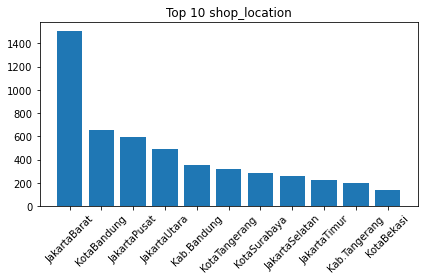

In [17]:
a = df['shop_location'].value_counts()[:11]
plt.bar(a.index,a.values)
plt.xticks(rotation = 45)
plt.title('Top 10 shop_location')
plt.tight_layout()
plt.show()

Top 10 online shop location are located in Jabodetabek, Bandung and Surabaya.

In [18]:
df['shop_name'].value_counts()[:11]

CON KAOS                   226
Kalostee ID                 67
VM VanMarvell               66
Kaos Polos Andalas          61
JIPILICIOUS                 53
KozeOfficial                41
Cotton Kenari Official      39
Infinide Official Store     38
Kaos polos indonesia 99     37
DEFAULT-322                 36
House of Cuff               36
Name: shop_name, dtype: int64

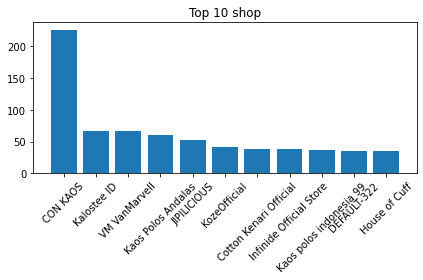

In [19]:
b = df['shop_name'].value_counts()[:11]
plt.bar(b.index,b.values)
plt.xticks(rotation = 45)
plt.title('Top 10 shop')
plt.tight_layout()
plt.show()

Top 10 online shop with most t-shirt product.

### Numerical

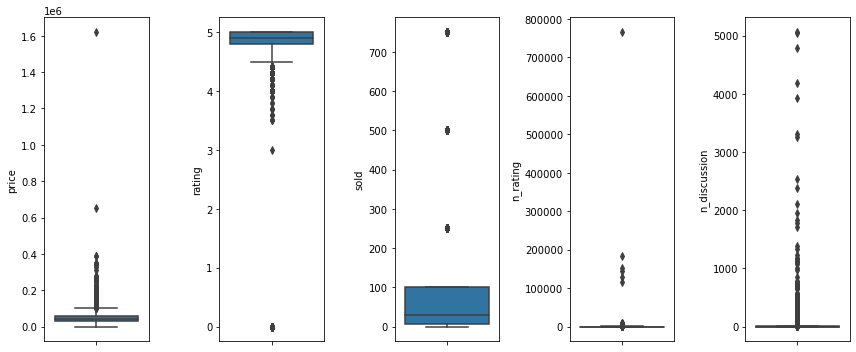

In [20]:
fig, ax = plt.subplots(1,len(num),figsize=(12,5))
for i in range(0,len(num)):
    sns.boxplot(data=df,y=num[i],ax=ax[i])
    
plt.tight_layout()
plt.show()

- price column have small distribution which having focused price
- mostly product having 3.5 - 5 rating
- product sold are distribute around 100 pcs.
- in n_rating and n_discussion columns having high variance values.

## Multivariate analysis

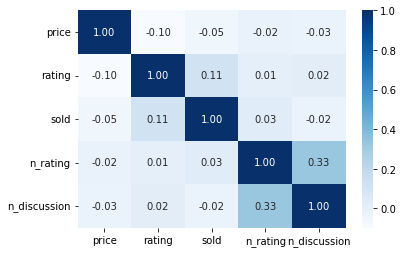

In [21]:
sns.heatmap(df[num].corr(),cmap='Blues',annot=True,fmt='.2f')
plt.show()

There is some small correlation in sold and rating, and n_discussion and n_rating.

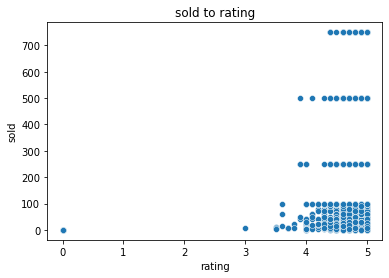

In [22]:
sns.scatterplot(data=df[num],x='rating',y='sold')
plt.title('sold to rating')
plt.show()

- Numbers of sold product increase significant when rating more than 3.5.
- Numbers of sold more than 100 are rounded to hundred, this because resources issue that round the values.

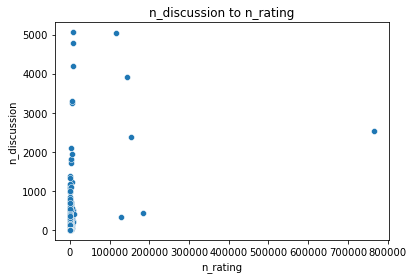

In [23]:
sns.scatterplot(data=df[num],x='n_rating',y='n_discussion')
plt.title('n_discussion to n_rating')
plt.show()

- Higher discussion mostly happend in low n_rating

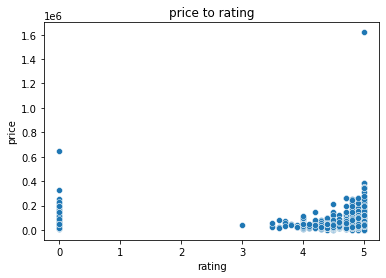

In [24]:
sns.scatterplot(data=df[num],x='rating',y='price')
plt.title('price to rating')
plt.show()

- There is some correlation in rating to price

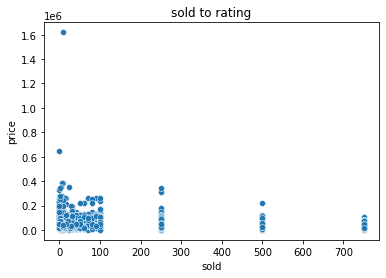

In [25]:
sns.scatterplot(data=df[num],x='sold',y='price')
plt.title('sold to rating')
plt.show()

### rating
Since there is some information that sold and price data focused in rating range 3.5 - 5 and exclude over priced and under priced product lets reduce our scope in this range.

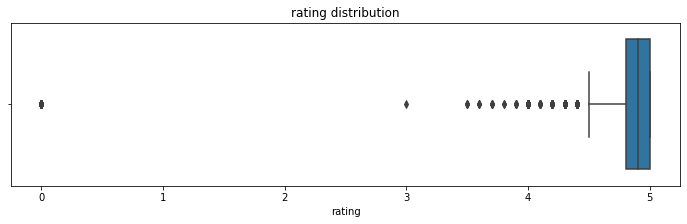

In [26]:
plt.figure(figsize=(12,3))
sns.boxplot(data=df,x='rating')
plt.title('rating distribution')
plt.show()

In [27]:
df_rating = df[(df['rating']>=3.5) & (df['price']<1000000) & (df['price']!=0)]

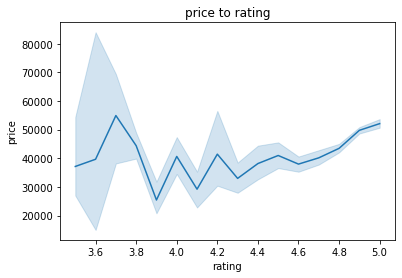

In [38]:
sns.lineplot(data=df_rating,x='rating',y='price')
plt.title('price to rating')
plt.show()

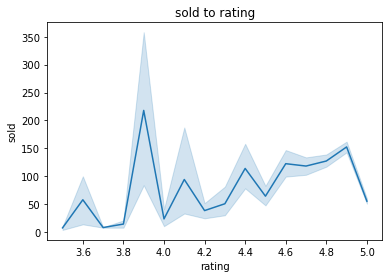

In [40]:
sns.lineplot(data=df_rating,x='rating',y='sold')
plt.title('sold to rating')
plt.show()

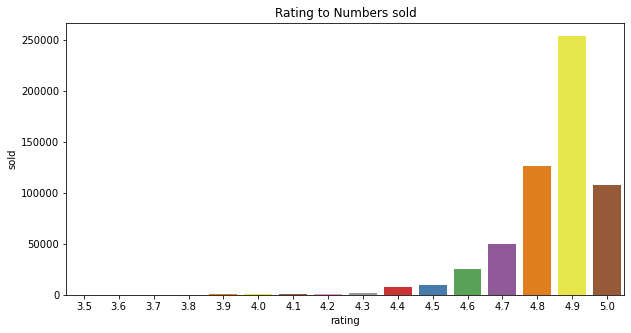

In [29]:
df_g = df_rating.groupby('rating')['sold'].sum()
df_g = df_g.reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=df_g,x='rating',y='sold',palette='Set1')
plt.title('Rating to Numbers sold')
plt.show()

The high number product were sold are in rating range >= 4.6.

In [30]:
#rating segment
df_rating['rating_segment'] = df_rating['rating'].map(lambda x: '3.5 - 4.5' if x<=4.5 else '4.6 - 5.0')

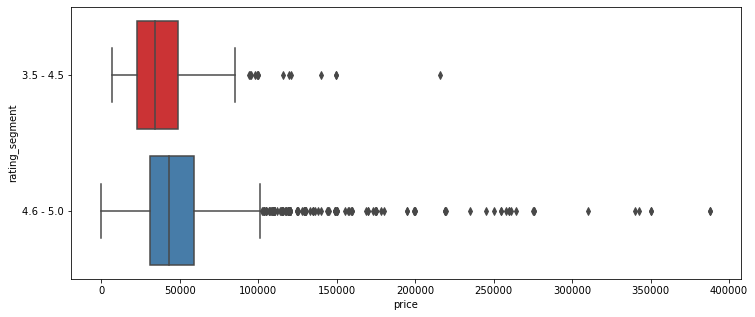

In [31]:
df_rating_ = df_rating.copy()
df_rating_['rating_segment'] = df_rating_['rating_segment'].astype('category')

plt.figure(figsize=(12,5))
sns.boxplot(data=df_rating_,x='price',y='rating_segment',palette='Set1')
plt.show()

There is slightly a difference in rating segment on product pricing.

### sold

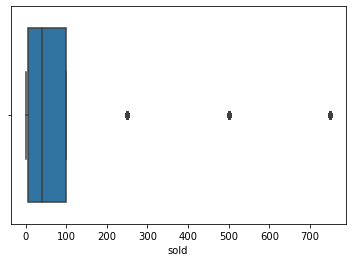

In [32]:
sns.boxplot(data=df_rating,x='sold')
plt.show()

Lets make segment of numbers of sold to <=100, around 250, around 500 and around 750

In [33]:
df_new = df_rating.copy()
df_new['sold_segment'] = df_new['sold'].map(lambda x: '<100' if x<=100 else 'around 250' if x==250 else 'around 500' if x==500 else 'around 750')

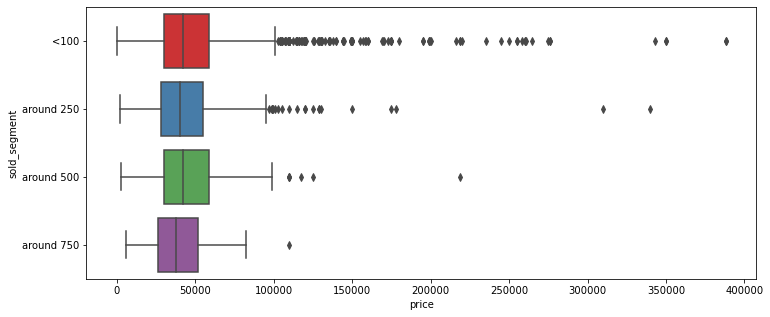

In [34]:
df_sold_ = df_new.copy()
df_sold_['sold_segment'] = df_sold_['sold_segment'].astype('category')

plt.figure(figsize=(12,5))
sns.boxplot(data=df_sold_,x='price',y='sold_segment',palette='Set1')
plt.show()

The lower sold segment having high variety product price.

In [35]:
df_g = df_new.groupby(['rating_segment','sold_segment'])['rating_segment'].count()
df_g

rating_segment  sold_segment
3.5 - 4.5       <100             305
                around 250        22
                around 500        10
                around 750         3
4.6 - 5.0       <100            4245
                around 250       551
                around 500       258
                around 750       170
Name: rating_segment, dtype: int64

# Insight


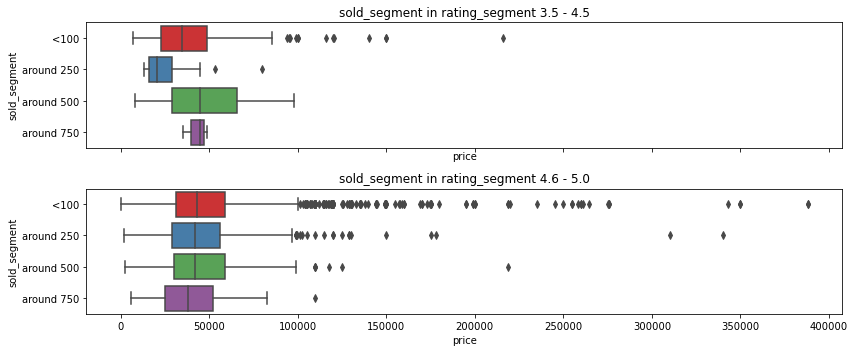

In [36]:
df_new_1 = df_new[df_new['rating_segment']=='3.5 - 4.5']
df_new_1['sold_segment'] = df_new_1['sold_segment'].astype('category')

df_new_2 = df_new[df_new['rating_segment']=='4.6 - 5.0']
df_new_2['sold_segment'] = df_new_2['sold_segment'].astype('category')

fig, ax = plt.subplots(2,1,figsize=(12,5),sharex=True)
sns.boxplot(data=df_new_1,x='price',y='sold_segment',palette='Set1',ax=ax[0])
sns.boxplot(data=df_new_2,x='price',y='sold_segment',palette='Set1',ax=ax[1])
ax[0].set_title('sold_segment in rating_segment 3.5 - 4.5')
ax[1].set_title('sold_segment in rating_segment 4.6 - 5.0')

plt.tight_layout()
plt.show()

In [37]:
bot = df_new_2['price'].quantile(0.25)
top = df_new_2['price'].quantile(0.75)
print(f'T-shirt price range {bot} - {top}')

T-shirt price range 30837.5 - 59000.0


Although there are another factor that can affect number of sold, rating, and price we can gather some usefull insight from chart above.
- T-shirt product are focused in rating 3.5 to 5.0.
- Product with price more than 100,000 tend to have number of sold under 500
- T-shirt market value are in range 30837.5 - 59000.0